In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ecommerce_sales_analysis.csv")

In [3]:
df.head(5)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [4]:
print(df.columns)

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')


In [5]:
df.shape

(1000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [7]:
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [8]:
df.drop('product_name', axis=1, inplace=True)


In [9]:
df.drop('product_id', axis=1, inplace=True)
#It was decided to exclude the Product name and Product ID column due to its lack of relevance in the analyses.


In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [12]:
#The data frame does not contain any null data

<Axes: >

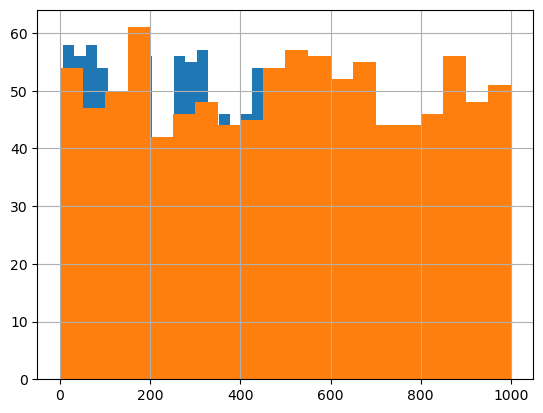

In [13]:
df['price'].hist(bins=20)
df['sales_month_1'].hist(bins=20)

## Monthly Sales Evolution
Below we can see the sales of the E-commerce in question in general.

In [15]:
sales_by_month = df.iloc[:, 4:].sum()

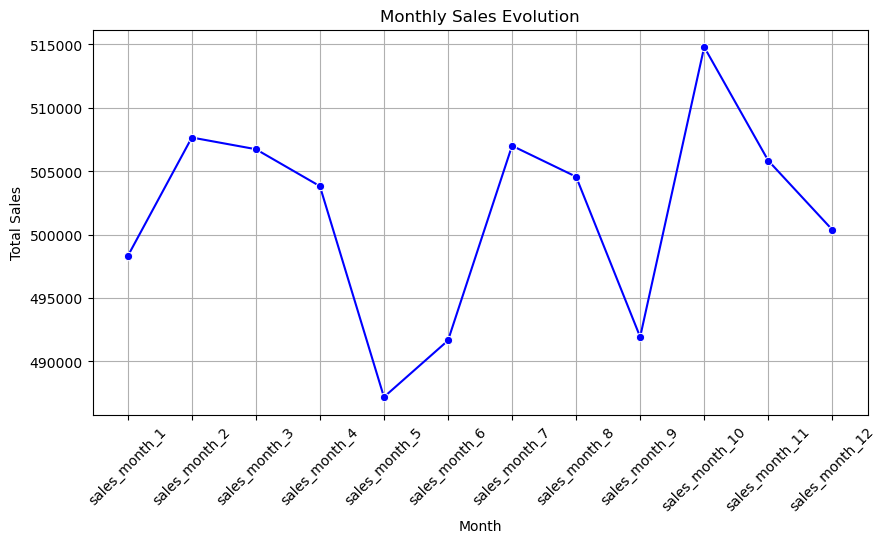

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Sales Evolution")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

## Top 3 categories

In [17]:
sales_columns = [col for col in df.columns if col.startswith('sales_month')]
df['total_sales'] = df[sales_columns].sum(axis=1)

In [18]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
print("Top 3 categories:")
print(top_categories)

Top 3 categories:
category
Books     938229
Toys      917101
Sports    916371
Name: total_sales, dtype: int64


<Axes: title={'center': 'Top 3 categories - Monthy'}>

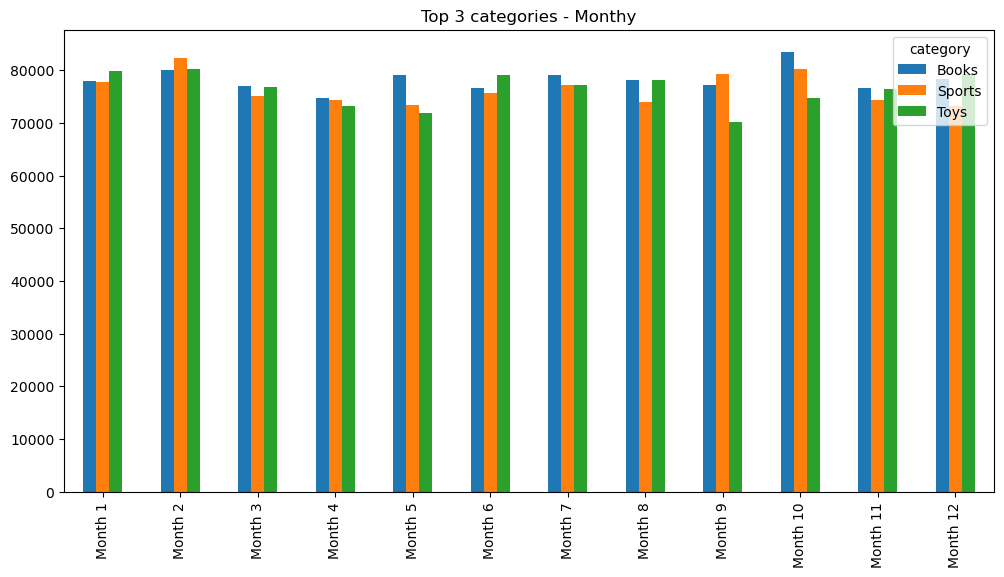

In [19]:
top_cat_df = df[df['category'].isin(top_categories.index)]

monthly_sales = top_cat_df.groupby('category')[sales_columns].sum().T
monthly_sales.index = [f'Month {i+1}' for i in range(12)]

monthly_sales.plot(kind='bar', figsize=(12,6), title="Top 3 categories - Monthy")

In [20]:
df.head()

,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094


<Axes: xlabel='total_sales', ylabel='category'>

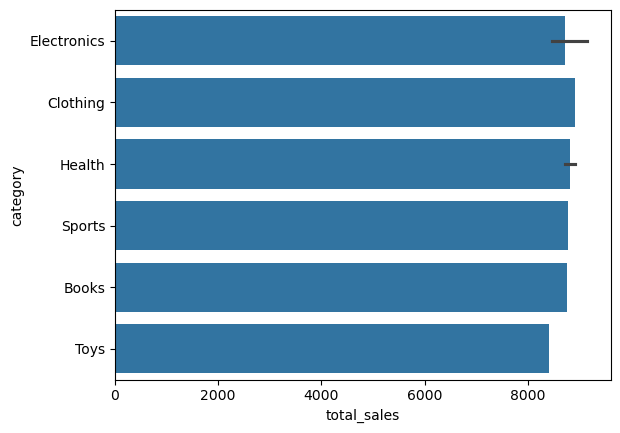

In [22]:
top_10_products = df.sort_values(by='total_sales', ascending=False).head(10)
sns.barplot(x='total_sales', y='category', data=top_10_products)

<Axes: >

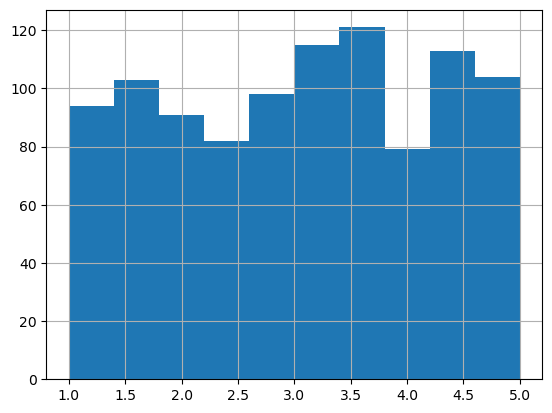

In [23]:
df['review_score'].hist(bins=10)

<Axes: xlabel='category', ylabel='total_sales'>

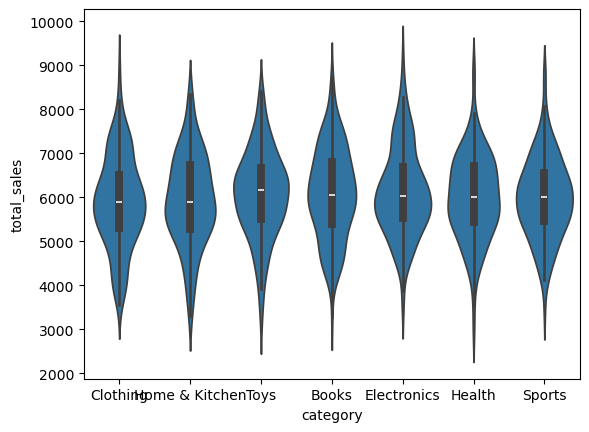

In [25]:
sns.violinplot(x='category', y='total_sales', data=df)

## Correlation 
To understand how much the variables are related, we continue with the analysis using the relation matrix. First, we will check whether the score impacts sales.

In [26]:
correlation = df[['review_score', 'review_count', 'total_sales']].corr()
print(correlation)

              review_score  review_count  total_sales
review_score      1.000000      0.027351    -0.018186
review_count      0.027351      1.000000    -0.069393
total_sales      -0.018186     -0.069393     1.000000


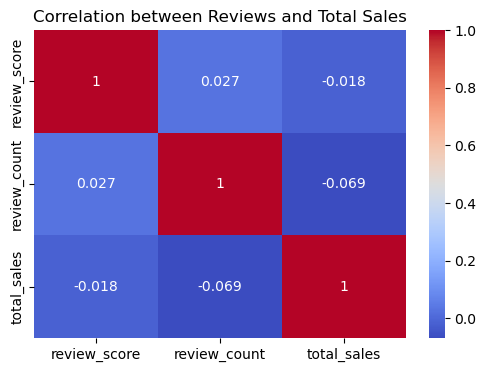

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Reviews and Total Sales")
plt.show()

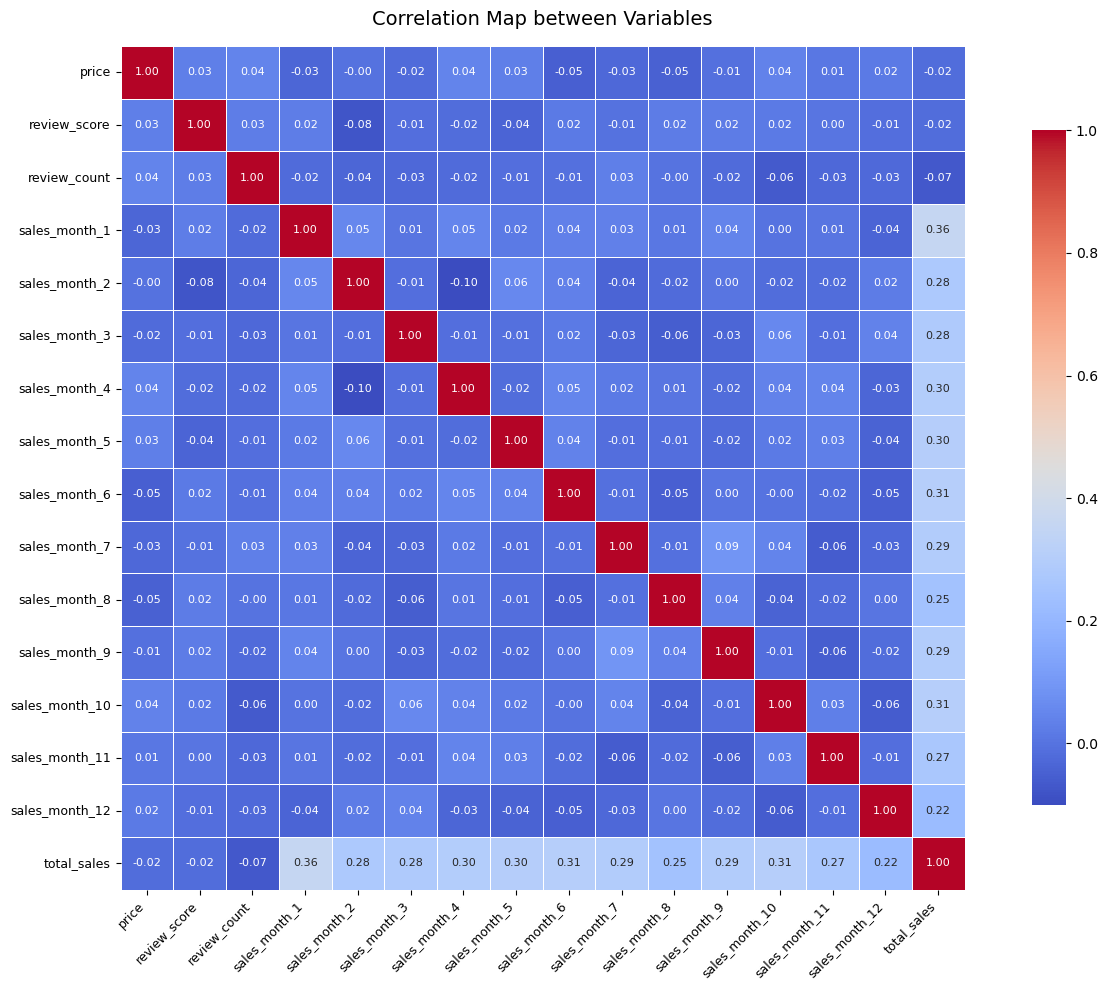

In [28]:
plt.figure(figsize=(14, 10))  

correlation = df.corr(numeric_only=True)
sns.heatmap(
    correlation, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 8}, 
    cbar_kws={"shrink": 0.8},  
    square=True
    
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Map between Variables", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Check the heatmap of the correlation which has been used to see the linear relationships between the variables in the dataset at first. The main focus is to see which variables are most strongly associated with total_sales.
With Monthly Sales Features having a:
    
Moderate to strong correlation with total_sales, this being observed in:
sales_month_1 to sales_month_6: 0.28 to 0.36
    
This implies that there is a major course of predicting total_sales. These will be the variables that may be key predictors in supervised learning models where the focus is on forecasting overall product sales.
Weak or No Correlation:
    
On the other hand, the following variables demonstrated weak or negligible correlations with total_sales:
price (correlation ≈ -0.02)
review_score (correlation ≈ -0.02)
review_count (correlation ≈ 0.07)

This indicates that factors, like price and good reviews, don't connect straight in a line with all the sales. So, their power to predict is low if used alone.

In [29]:
# Calculate correlation
correlation = df.corr(numeric_only=True)

# Select only correlations with 'total_sales'
target_corr = correlation['total_sales'].drop('total_sales')  # removes the self-correlation of 1

# Sort by strength of correlation
target_corr = target_corr.sort_values(ascending=False)

# Print analysis
print("📊 Correlations with Total Sales:\n")
for var, corr in target_corr.items():
    impact = ""
    if abs(corr) >= 0.5:
        impact = "strong"
    elif abs(corr) >= 0.3:
        impact = "moderate"
    elif abs(corr) >= 0.1:
        impact = "weak"
    else:
        impact = "none"
        
    direction = "positive" if corr > 0 else "negative"
    
    print(f"- {var}: {direction} correlation ({impact}) -> coefficient = {corr:.2f}")

📊 Correlations with Total Sales:

- sales_month_1: positive correlation (moderate) -> coefficient = 0.36
- sales_month_10: positive correlation (moderate) -> coefficient = 0.31
- sales_month_6: positive correlation (moderate) -> coefficient = 0.31
- sales_month_5: positive correlation (moderate) -> coefficient = 0.30
- sales_month_4: positive correlation (weak) -> coefficient = 0.30
- sales_month_9: positive correlation (weak) -> coefficient = 0.29
- sales_month_7: positive correlation (weak) -> coefficient = 0.29
- sales_month_3: positive correlation (weak) -> coefficient = 0.28
- sales_month_2: positive correlation (weak) -> coefficient = 0.28
- sales_month_11: positive correlation (weak) -> coefficient = 0.27
- sales_month_8: positive correlation (weak) -> coefficient = 0.25
- sales_month_12: positive correlation (weak) -> coefficient = 0.22
- price: negative correlation (none) -> coefficient = -0.02
- review_score: negative correlation (none) -> coefficient = -0.02
- review_count: 

This month’s sales are moderately influenced by the sales of the previous months as well as by the distant past performance. There tends to be carry-over sales in the first and fifth to sixth and tenth months: strong sales in one month tend to carry over into the next, reflecting short-term momentum, while moderate lag 5 (ρ≈0.30), 6 (ρ≈0.31) and lag 10 (ρ≈0.31) point to semi-annual and near-annual seasonality likely driven by cyclical promotions or inventory cycles.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Home & Kitchen'),
  Text(5, 0, 'Sports'),
  Text(6, 0, 'Toys')])

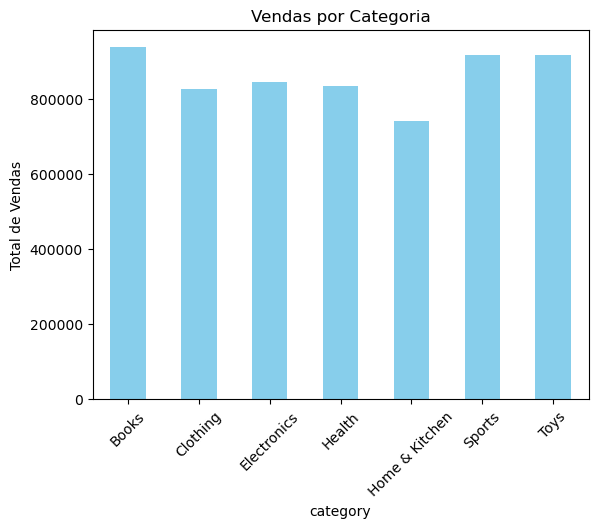

In [30]:
sales_by_category = df.groupby('category')['total_sales'].sum()
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Vendas por Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)

In [ ]:
test

## Decision Tree 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_tree = df.copy()

In [ ]:
df_tree['sales_class'] = df_tree['total_sales'].apply(lambda x: 1 if x >= df_tree['total_sales'].median() else 0)

In [ ]:
features = [
    'category', 'price', 'review_score', 'review_count',
    'sales_month_1', 'sales_month_2', 'sales_month_3', 'sales_month_4',
    'sales_month_5', 'sales_month_6', 'sales_month_7', 'sales_month_8',
    'sales_month_9', 'sales_month_10', 'sales_month_11', 'sales_month_12'
]


In [ ]:
le = LabelEncoder()
df_tree['category'] = le.fit_transform(df_tree['category'])

In [ ]:
X = df_tree[features]
y = df_tree['sales_class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print("=== Decision Tree ===")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

In [ ]:
#Cross validation 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

# Melhor modelo
best_dt = grid_dt.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Best Parameters:", grid_dt.best_params_)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Validation of Results: Critical Analysis of Model Performance
I assessed the performance of the Decision Tree classifier before and after hyperparameter tuning using cross-validation. The comparison clearly shows that there is a measurable improvement in the quality of the model after tuning, therefore underlining the importance of systematic validation.


Baseline Model (Before Tuning)
Accuracy: 65%
F1-score (average): 0.64


Confusion Matrix: 71 misclassifications
Observation: The model shows imbalanced recall (higher for Class 0 than Class 1). In simple terms, it can't effectively identify the products that sell well. Typically, this happens when the tree is too shallow or the decision thresholds are not well optimized.


Optimized Model (After GridSearchCV)
Accuracy: 75%
F1-score (average): 0.75
Confusion Matrix: 50 misclassifications
Observation: After tuning, it became more balanced in predicting both the classes with the measure of improving precision and recall. With a deeper tree and the control on the splits, it can catch more complex patterns about the data without going too far.


Insights from Validation
A 10% gain in the accuracy and F1-score shows better generalization.

There was now better tuning in both precision and recall, showing that it would be more reliable in real-world prediction tasks.

The decrease from 71 to 50 in getting it wrong proves that the model is making better choices, a result checked by cross-validation performance consistency.





In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features, class_names=["Baixa Venda", "Alta Venda"], filled=True, max_depth=3)
plt.title("Árvore de Decisão (nível 0 a 3)")
plt.show()

In [ ]:
from sklearn.tree import export_text

features = X_train.columns.tolist()  # ou sua lista de nomes das colunas
rules = export_text(dt, feature_names=features)
print(rules)


In the decision tree analysis undertaken, the variable of most significant influence was sales in the first month (sales_month_1), which appeared at the very base of the tree with a critical threshold value of 382 units. Information on sales from the subsequent months, particularly the 2nd, 3rd, 5th, and 9th months, further played a strong supportive role in subsequent segmentation, bringing to light rather homogenous purchase behaviors. The variable price also showed a strong impact and was used very often to further fine-tune classifications with several important cutoff points. Where the sales volume of the products was more or less similar, it was the review scores and review counts which were bringing distinction and, hence, indicating the importance of customer feedback in the outcomes. In the last set of branches, product category came into a fine picture by tuning the classification in certain specific groups.

In [ ]:
## Random Forest Regressor

In [ ]:
sales_cols = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[sales_cols].sum(axis=1)

In [ ]:
top_categories = df.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)

In [ ]:
print("Top 3 categories:")
print(top_categories)

In [ ]:
print(top_categories.index)

In [ ]:
top_months_dict = {}

for category in df['category'].unique():
    df_cat = df[df['category'] == category]
    monthly_totals = {
        i: df_cat[f'sales_month_{i}'].sum() for i in range(1, 13)
    }
    top_3_months = sorted(monthly_totals, key=monthly_totals.get, reverse=True)[:3]
    top_months_dict[category] = top_3_months

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

In [ ]:
for category in top_categories.index:
    print(f"\n Forecast for category: {category}")
    top_months = top_months_dict[category]

    df_cat = df[df['category'] == category].copy()

    # Build dataset for ML: each row represents one month for a given category
    data = []

    for i in range(1, 13):
        for idx, row in df_cat.iterrows():
            data.append({
                'month': i,
                'price': row['price'],
                'review_score': row['review_score'],
                'review_count': row['review_count'],
                'sales': row[f'sales_month_{i}']
            })

    df_ml = pd.DataFrame(data)

    # Filter only the top 3 selling months
    df_ml = df_ml[df_ml['month'].isin(top_months)]

    # Features and target
    X = df_ml[['month', 'price', 'review_score', 'review_count']]
    y = df_ml['sales']

    # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test MAE: {mae:.2f}")

    # Forecast sales for the same top 3 months in the next year
    forecast_input = pd.DataFrame({
        'month': top_months,
        'price': [df_cat['price'].mean()] * 3,
        'review_score': [df_cat['review_score'].mean()] * 3,
        'review_count': [df_cat['review_count'].mean()] * 3
    })

    forecast = rf.predict(forecast_input)
    print(" Sales forecast for top 3 months next year:")
    for m, f in zip(top_months, forecast):
        print(f" - Month {m}: {f:.0f} sales")

## Tuning com GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Substituindo 'auto' por valores válidos
}

# Inicializando o GridSearchCV
grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ajuste do modelo
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Previsões e cálculo das métricas
y_pred_best_rf = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best = r2_score(y_test, y_pred_best_rf)

# Exibindo os resultados
print("Best Params:", grid_rf.best_params_)
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")

## Validation of Results: Critical Analysis

Results Validation: Critical Evaluation

It shows that there was no marked improvement in predictive accuracy as a result of hyperparameter tuning the Random Forest Regressor over and above the baseline. These two models have almost similar metrics.
At about 0.33–0.34, the average absolute prediction error is approximately the same for baseline and tuned versions.
At 0.37; these errors are of about the same size, including outliers.
R² (Coefficient of Determination) stayed at 0.45 so both models explain about 45% of the variation within the target variable (total_sales).

These results tell that the Random Forest model has reached its performance limit and it can be because:

The features do not have enough predictive power;
There is a weak or non-linear relationship that is not being handled well.
It would be of value to dive more into the data and see if it needs feature engineering, interaction terms, or other algorithms like Gradient Boosting or XGBoost.
In a nutshell, while the model accuracy is moderate, better results may come not from more tuning but from using richer input data or other model families more suitable for the patterns that are present.

The model was checked with Mean Absolute Error and it stayed under 300 in all the classes— a pretty good model. For instance, Class 0 had an MAE of 277.68 and the top précised sales in Months 7, 2, and 10 with 531 to 551 units. This shows that there are peaks of sales by season or when there is a campaign during these months.

Likewise, Category 6 and Category 5 resulted in MAEs of 245.11 and 288.34. Category 6 should be best in Months 2, 1, and 12— strong early and end-of-year demand. On the other hand, Category 5's forecast shows peak sales in Months 10, 9, and 2— a concentration in the latter half of the year. These results can guide inventory planning and marketing strategies by highlighting critical sales periods per product category.

## ARIMA 



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [ ]:
categoria = 'Books'
df_cat = df[df['category'] == categoria]

In [ ]:
sales_columns = [f'sales_month_{i}' for i in range(1, 13)]

In [ ]:
monthly_sales = df_cat[sales_columns].sum().reset_index()
monthly_sales.columns = ['month', 'sales']

In [ ]:
monthly_sales['Date'] = pd.date_range(start='2023-01-01', periods=12, freq='MS')

In [ ]:
df_filt = monthly_sales[['Date', 'sales']].copy()

In [ ]:
df_filt['Date'] = pd.to_datetime(df_filt['Date'], format='%Y-%m-%d')
df_filt.index = df_filt['Date']
df_filt.drop('Date', axis=1, inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
if df_filt['sales'].nunique() > 1:
    result = adfuller(df_filt['sales'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
else:
    print("The series is constant; ADF test cannot be applied.")

In [ ]:
serie = df_filt['sales']

In [ ]:
p = d = q = range(0, 3)

# Gere todas as combinações possíveis de (p, d, q)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf  # Inicializa o valor do AIC com infinito para garantir que qualquer AIC encontrado seja melhor
best_order = None
best_model = None

# Teste cada combinação de (p, d, q)
for order in pdq:
    try:
        # Crie e ajuste o modelo ARIMA com a combinação (p, d, q)
        model = ARIMA(serie, order=order)
        results = model.fit()

        # Verifique se o AIC do modelo atual é melhor que o melhor AIC encontrado até agora
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results

    except Exception as e:
        # Se ocorrer um erro, continue para a próxima combinação de (p, d, q)
        print(f"Erro ao ajustar ARIMA{order}: {e}")
        continue

# Imprima o melhor modelo encontrado
print(f"Best Model ARIMA: {best_order} com AIC = {best_aic:.2f}")

In [ ]:
forecast = best_model.forecast(steps=6)
forecast_index = pd.date_range(start=serie.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(serie.index, serie, label='History')
plt.plot(forecast_series.index, forecast_series.values, label='Forecast', linestyle='--', color='orange')
plt.title(f'Sales Forecast ARIMA {best_order}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Expected sales for the next 6 months:")
print(forecast_series)

## SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)
df['sales_class'] = df['total_sales'].apply(lambda x: 1 if x >= df['total_sales'].median() else 0)

In [ ]:
features = [
    'category', 'price', 'review_score', 'review_count',
    'sales_month_1', 'sales_month_2', 'sales_month_3', 'sales_month_4',
    'sales_month_5', 'sales_month_6', 'sales_month_7', 'sales_month_8',
    'sales_month_9', 'sales_month_10', 'sales_month_11', 'sales_month_12'
]

In [ ]:
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])


In [ ]:
X = df[features]
y = df['sales_class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)


In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

The Support Vector Machine (SVM) model elicited robust classification performance, having an overall accuracy of 97%. It managed to correctly classify both high-selling and low-selling products, having precision and recall both above 0.95 for the aforementioned classes. A high precision for high-sales products at 0.99 means that for those instances when it does flag a product as a strong seller, it is usually correct. A high recall for low-sales products at 0.99 means that it hardly ever misses identifying those items with lower sales performance. These findings strongly suggest that the SVM is able to do an excellent job of discriminating categories of product sales.

## Insights


It helps classify the products based on the potential for sale and therefore can be used to make decisions regarding inventory planning as well as all marketing and promotional decisions. The monthly sales and price of the product were strong determinants of the model’s performance whilst the review-related metrics (score and count) didn’t matter much, just as was found in earlier correlation analysis. In sum, the model that may be used to forecast product demand and enhance the sales strategy in a competitive e-commerce environment to be powerful.

In [ ]:
Arima and SVM 

Comparison between models: with metrics such as MAE, RMSE, R², Accuracy, Precision, Recall, F1-Score (as applicable).

Hyperparameters and cross-validation (mandatory): use GridSearchCV or RandomizedSearchCV to improve the models.

Validation of results: critical analysis of the models' performance